Rotational partition function 

Run from microsoft azure
https://notebooks.azure.com/pmke226/libraries/asdfasdfasdfasdf


In [1]:
import numpy as np
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Functions for running partition function calculations

In [2]:
Nak = 0.0083144 # Na*k/1e3
def CalcPop(J,theta=15, # [K]
                T=300 # [L]
           ):
    g=2*J+1
    #E/kT = theta/T*J(J+1)
    JJ1 = J*(J+1)
    theta_T = theta/np.float(T)
    E_kT = JJ1*theta_T
    N = g * np.exp(-E_kT)
    #print J,g,JJ1,theta_T,E_kT, N
    return E_kT,N


def CalcThermo(theta,T,Js = np.arange(22),verbose=False):
  E_kTs,Ns = CalcPop(Js,T=T,theta=theta)    
  z = np.sum(Ns)
  Ps = Ns/z
  Us = E_kTs*Nak*np.float(T)

  pUs = Ps*Us
  U = np.sum(pUs)  
    
  if verbose:  
    print "Partition function ", z
    print "Stat. Mech Internal energy [RT]", U
    print "Equipartion Internal energy (2/2 RT): %f"% (T*Nak)
  return Js,Ps, U

def PlotInternalEnergies(theta=15,Ts = np.arange(500)+1):
    #vFunc = np.vectorize(CalcThermo)
    #dummy, Us  = vFunc(T=Ts,theta=theta)

    zipped = np.array([CalcThermo(T=T,theta=theta) for T in Ts])
    Us = zipped[:,2]
    Ueqp = Ts*Nak
    plt.plot(Ts,Ueqp/(Nak*Ts),label="Equipartition principle")
    plt.plot(Ts,Us/(Nak*Ts),label="Stat Mech")
    plt.title("Internal energy")
    plt.xlabel("T [K]")
    plt.ylabel("U/RT")

User can change temperature, theta and obtain Ps (probability of each J level ) and total internal energy, U

Partition function  20.3366988164
Stat. Mech Internal energy [RT] 2.45260671873
Equipartion Internal energy (2/2 RT): 2.494320


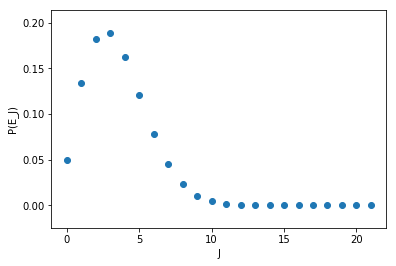

In [3]:

# CHANGE ME 
T = 300. # K 
theta = 15  # K

# RUN ME
Js,Ps, U = CalcThermo(theta=15,T=T,verbose=True)
plt.scatter(Js,Ps)
plt.ylabel("P(E_J)")
plt.xlabel("J")

Plots comparisons of internal energy from stat mech and equipartition principle 

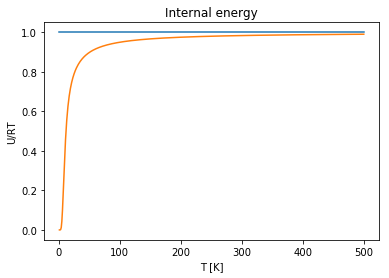

In [4]:
PlotInternalEnergies(theta=15)